<a href="https://colab.research.google.com/github/yulia1309/visualprogram/blob/main/%D0%BB%D0%B0%D0%B1%D0%BE%D1%801.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

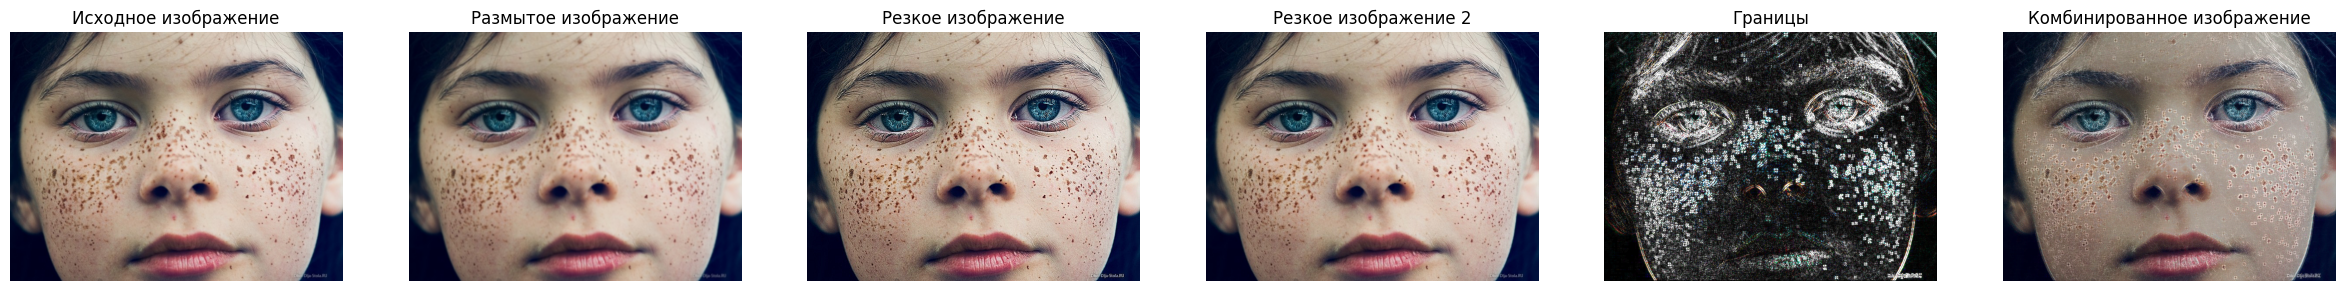

In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Загрузка изображения из локального файла
image = cv2.imread('/content/vesnushki.jpg')

# Обработка
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
sharpened = cv2.filter2D(image, -1, kernel)
sharpened_2 = cv2.addWeighted(image, 1.5, blurred_image, -0.5, 0)

# Применение оператора Собеля для нахождения границ
edges = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=5)
edges = cv2.convertScaleAbs(edges)

# Комбинирование изображений
combined = cv2.addWeighted(blurred_image, 0.5, edges, 0.5, 0)
combined = cv2.addWeighted(combined, 0.5, sharpened, 0.5, 0)

# Преобразуем изображения из BGR в RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
blurred_image_rgb = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB)
sharpened_rgb = cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB)
sharpened_2_rgb = cv2.cvtColor(sharpened_2, cv2.COLOR_BGR2RGB)
edges_rgb = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)  # Преобразуем границы в RGB
combined_rgb = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)  # Преобразуем комбинированное изображение в RGB

# Функция для отображения изображений
def show_images(titles, images):
    plt.figure(figsize=(30, 5))  # Увеличиваем размер фигуры для 6 изображений
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Отображаем изображения
titles = ['Исходное изображение', 'Размытое изображение', 'Резкое изображение', 'Резкое изображение 2', 'Границы', 'Комбинированное изображение']
images = [image_rgb, blurred_image_rgb, sharpened_rgb, sharpened_2_rgb, edges_rgb, combined_rgb]
show_images(titles, images)













